In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Log\feature_selection.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda: data_merged.csv")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Data\feature_selection\feature_enginered.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0.2           489121 non-null  int64  
 1   Unnamed: 0.1           489121 non-null  float64
 2   Unnamed: 0             489121 non-null  float64
 3   id                     489121 non-null  float64
 4   week                   489121 non-null  float64
 5   center_id              489121 non-null  float64
 6   meal_id                489121 non-null  float64
 7   checkout_price         489121 non-null  float64
 8   base_price             489121 non-null  float64
 9   emailer_for_promotion  489121 non-null  float64
 10  homepage_featured      489121 non-null  float64
 11  num_orders             489121 non-null  float64
 12  category               489121 non-null  float64
 13  cuisine                489121 non-null  float64
 14  price_diff             489121 non-nu

In [4]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,...,category,cuisine,price_diff,price_diff_ratio,season,num_orders_log,price_diff_log,checkout_price_log,base_price_log,num_orders_sqrt
0,0,-1.732047,-1.732047,0.897671,-1.777284,-0.589303,-0.255481,0.120524,0.091689,-0.295229,...,-0.413866,-1.450253,-0.028835,-0.314453,0.0,-0.225401,-0.315647,-1.358994,-1.341016,0.082176
1,1,-1.732040,-1.732040,1.503205,-1.777284,-0.589303,-0.058187,0.120524,0.076121,-0.295229,...,0.604420,-0.287105,-0.044403,-0.583254,0.0,0.029939,-0.683193,-1.358994,-1.465651,0.102870
2,2,-1.732033,-1.732033,0.672019,-1.777284,-0.589303,0.939240,0.118750,0.076149,-0.295229,...,0.095277,-0.287105,-0.042601,-0.559374,0.0,-0.192399,-0.640342,-1.374281,-1.465422,0.085129
3,3,-1.732026,-1.732026,0.611351,-1.777284,-0.589303,0.208524,0.303003,0.361478,-0.295229,...,1.622706,0.876043,0.058475,0.161763,0.0,-0.564604,1.642299,0.096875,0.575292,0.041088
4,4,-1.732019,-1.732019,1.375217,-1.777284,-0.589303,1.107304,0.216567,0.177012,-0.295229,...,1.113563,-0.868679,-0.039554,-0.223443,0.0,-0.603321,-0.568076,-0.565453,-0.688030,0.033343


In [5]:
columns_list = df.columns.tolist()
print(columns_list)


['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'price_diff', 'price_diff_ratio', 'season', 'num_orders_log', 'price_diff_log', 'checkout_price_log', 'base_price_log', 'num_orders_sqrt']


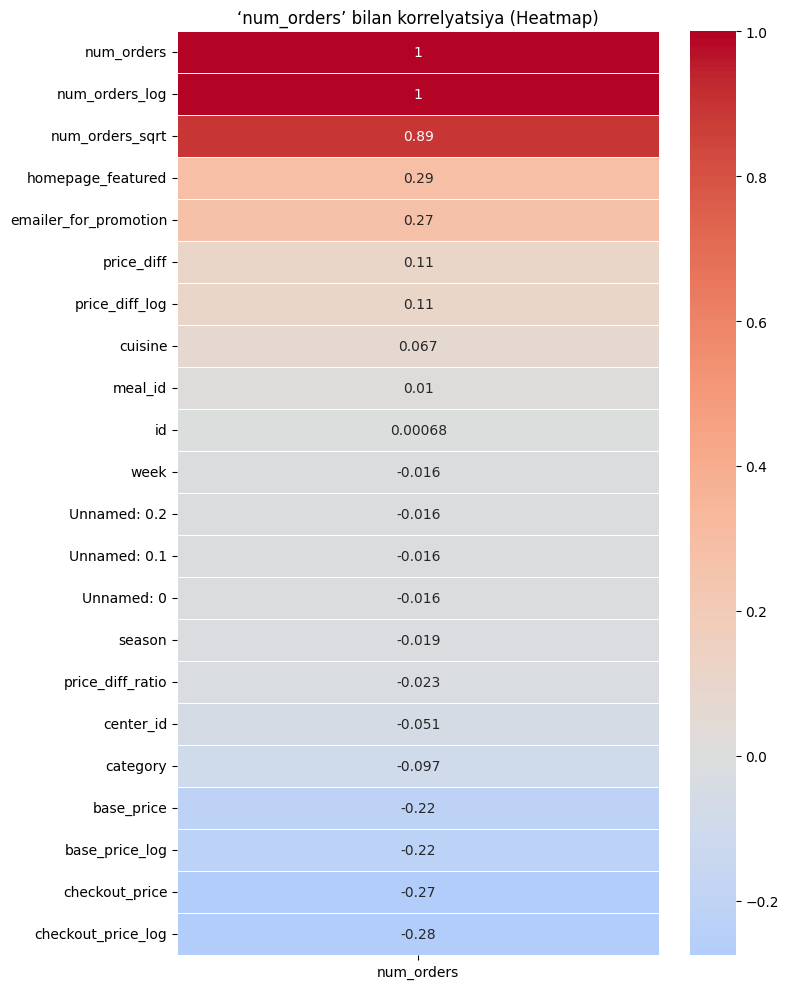

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Korrelyatsiya matritsasini hisoblash
corr_matrix = df.corr(numeric_only=True)

# 2. Faqat `num_orders` bilan bo‘lgan korrelyatsiyalarni ajratish
target_corr = corr_matrix[["num_orders"]].sort_values(by="num_orders", ascending=False)

# 3. Heatmap (vizual) ko‘rinishda ko‘rsatish
plt.figure(figsize=(8, 10))
sns.heatmap(target_corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("‘num_orders’ bilan korrelyatsiya (Heatmap)")
plt.tight_layout()
plt.show()


In [7]:
import plotly.express as px

# Korrelyatsiya matritsasini hisoblash (faqat raqamli ustunlar)
corr_matrix = df.corr(numeric_only=True)

# Faqat 'num_orders' bilan bog‘liq ustunlarni ajratish (o‘zini o‘zidan tashqari)
target_corr = corr_matrix["num_orders"].drop("num_orders").sort_values(ascending=False).reset_index()
target_corr.columns = ["Feature", "Correlation"]

# Bar chart orqali plotly bilan ko‘rsatish
fig = px.bar(target_corr, x="Correlation", y="Feature",
             orientation='h',
             title="`num_orders` bilan ustunlar korrelyatsiyasi (Plotly)",
             text="Correlation",
             color="Correlation",
             color_continuous_scale="RdBu",
             range_color=[-1, 1])

fig.update_layout(yaxis=dict(autorange="reversed"))  # Yuqoridan pastga tartibda ko‘rsatish
fig.show()


In [8]:
import plotly.express as px

# Korrelyatsiyani hisoblash
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix["num_orders"].drop("num_orders").sort_values().reset_index()
target_corr.columns = ["Feature", "Correlation"]

# Dot plot
fig = px.scatter(target_corr, y="Feature", x="Correlation",
                 title="`num_orders` bilan ustunlar korrelyatsiyasi (Dot Plot)",
                 color="Correlation", color_continuous_scale="RdBu", range_color=[-1, 1],
                 size=[0.5]*len(target_corr),  # barqaror nuqta o'lchami
                 symbol_sequence=["circle"])

fig.update_traces(marker=dict(size=12))  # nuqtalarni kattalashtirish
fig.update_layout(xaxis=dict(range=[-1, 1]), yaxis=dict(title="Feature"))
fig.show()


In [9]:
import plotly.express as px

# Korrelyatsiya matritsasini hisoblash
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix["num_orders"].drop("num_orders").sort_values(ascending=False).reset_index()
target_corr.columns = ["Feature", "Correlation"]

# Vertikal bar chart
fig = px.bar(target_corr, x="Feature", y="Correlation",
             title="num_orders bilan ustunlar korrelyatsiyasi (Vertical Bar Chart)",
             color="Correlation",
             color_continuous_scale=px.colors.diverging.PuOr,
             range_color=[-1, 1],
             text=target_corr["Correlation"].round(2))

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, yaxis_range=[-1, 1], yaxis_title="Correlation")
fig.show()


# Filtering (Filtrlash) usuli: Korrelyatsiyaga asoslangan feature selection

In [16]:
import numpy as np

# Korrelatsiya matritsasini olish 
corr_matrix = df.corr(numeric_only=True)

# Target bilan korrelyatsiyaga qarab feature tanlash 
threshold = 0.02
target_corr = corr_matrix["num_orders"].drop("num_orders")
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

print("Target bilan tanlangan feature'lar:", selected_features)

# Endi o'zaro yuqori korrelyatsiya bor feature'larni topamiz (threshold=0.85)
high_corr_pairs = []
corr_threshold = 0.95

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        f1 = selected_features[i]
        f2 = selected_features[j]
        corr_value = corr_matrix.loc[f1, f2]
        if abs(corr_value) > corr_threshold:
            high_corr_pairs.append((f1, f2, corr_value))

if high_corr_pairs:
    print("\nYuoqri o'zaro korrelyatsiyaga ega feature juftliklari:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} va {pair[1]}: korrelyatsiya = {pair[2]:.3f}")
else:
    print("\nYuoqri o'zaro korrelyatsiyaga ega feature juftliklari topilmadi.")


Target bilan tanlangan feature'lar: ['center_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'price_diff', 'price_diff_ratio', 'num_orders_log', 'price_diff_log', 'checkout_price_log', 'base_price_log', 'num_orders_sqrt']

Yuoqri o'zaro korrelyatsiyaga ega feature juftliklari:
checkout_price va base_price: korrelyatsiya = 0.954
checkout_price va checkout_price_log: korrelyatsiya = 0.998
checkout_price va base_price_log: korrelyatsiya = 0.954
base_price va checkout_price_log: korrelyatsiya = 0.954
base_price va base_price_log: korrelyatsiya = 0.998
price_diff va price_diff_log: korrelyatsiya = 0.999
checkout_price_log va base_price_log: korrelyatsiya = 0.957


In [17]:
if high_corr_pairs:
    print("\nYuoqri o'zaro korrelyatsiyaga ega feature juftliklari Markdown jadvali:")
    print("| Feature 1           | Feature 2           | Korrelyatsiya |")
    print("|---------------------|---------------------|--------------|")
    for f1, f2, corr_value in high_corr_pairs:
        print(f"| {f1:<19} | {f2:<19} | {corr_value:>12.3f} |")
else:
    print("\nYuoqri o'zaro korrelyatsiyaga ega feature juftliklari topilmadi.")



Yuoqri o'zaro korrelyatsiyaga ega feature juftliklari Markdown jadvali:
| Feature 1           | Feature 2           | Korrelyatsiya |
|---------------------|---------------------|--------------|
| checkout_price      | base_price          |        0.954 |
| checkout_price      | checkout_price_log  |        0.998 |
| checkout_price      | base_price_log      |        0.954 |
| base_price          | checkout_price_log  |        0.954 |
| base_price          | base_price_log      |        0.998 |
| price_diff          | price_diff_log      |        0.999 |
| checkout_price_log  | base_price_log      |        0.957 |


In [20]:
selected_features = [
    'center_id',
    'checkout_price',
    'base_price',
    'emailer_for_promotion',
    'homepage_featured',
    'category',
    'cuisine',
    'price_diff',
    'price_diff_ratio',
    'num_orders_log',
    'price_diff_log',
    'checkout_price_log',
    'base_price_log',
    'num_orders_sqrt'
]

print("| Index | Feature Name           |")
print("|-------|------------------------|")

for i, feature in enumerate(selected_features, start=1):
    print(f"| {i:<5} | {feature:<22} |")


| Index | Feature Name           |
|-------|------------------------|
| 1     | center_id              |
| 2     | checkout_price         |
| 3     | base_price             |
| 4     | emailer_for_promotion  |
| 5     | homepage_featured      |
| 6     | category               |
| 7     | cuisine                |
| 8     | price_diff             |
| 9     | price_diff_ratio       |
| 10    | num_orders_log         |
| 11    | price_diff_log         |
| 12    | checkout_price_log     |
| 13    | base_price_log         |
| 14    | num_orders_sqrt        |


In [21]:
# Features (selected_features) ni CSV ga saqlash
X = df[selected_features]
X.to_csv(r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Data\feature_selection\selected_features.csv", index=False)

# Target (num_orders) ni CSV ga saqlash
y = df["num_orders"]
y.to_csv(r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Data\feature_selection\target_num_orders.csv", index=False)


# Wrapper usuli: Recursive Feature Elimination (RFE) bilan

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Model tanlash (masalan, linear regression)
model = LinearRegression()

# RFE obyekti yaratish — necha feature tanlashni xohlaymiz (masalan, 5 ta)
rfe = RFE(model, n_features_to_select=5)

# X va y ni aniqlash (categorical bo‘lsa oldin encoding qilish kerak)
X = df[selected_features]  # yuqoridagi filtering dan yoki barcha numeric ustunlar
y = df["num_orders"]

# Fit qilish
rfe.fit(X, y)

# Tanlangan ustunlar
selected_features_rfe = X.columns[rfe.support_].tolist()
print("RFE bilan tanlangan feature'lar:", selected_features_rfe)


RFE bilan tanlangan feature'lar: ['checkout_price', 'base_price', 'price_diff', 'num_orders_log', 'num_orders_sqrt']


# Embedded usuli: Lasso Regression yordamida feature selection 

In [12]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = df[selected_features]  # yoki boshqa X
y = df["num_orders"]

# Lasso modeli yaratish (alpha — regulyarizatsiya darajasi)
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# SelectFromModel yordamida tanlash
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X.columns[model.get_support()].tolist()

print("Lasso bilan tanlangan feature'lar:", selected_features_lasso)


Lasso bilan tanlangan feature'lar: ['num_orders_log']
